<a href="https://colab.research.google.com/github/vincentyliu2001/BIO74.03-Exercises/blob/main/CompModNervSys_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL 74.03 (SP23): Computational Modeling of the Nervous System 
## Exercise 2: Calculating and visualizing electric fields and currents in Python

### Exercise goals

1) Gain intuition for electric field and voltage in the context of point charges

2) Learn how to use NumPy to do basic calculations on vectors and arrays

3) Learn how to use matplotlib/plotly to visualize 1, 2, and 3D functions

Work through the code below, running each cell, adding code where required, and making sure you understand the output. When you see questions with ***Q:*** preceding them, write your responses in text cells. 

In [1]:
!git clone https://github.com/CompModNervSystem/CompModNervSys-BioElectroStatics.git # downloads repository into our Google colab session's file system

Cloning into 'CompModNervSys-BioElectroStatics'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14 (delta 4), reused 14 (delta 4), pack-reused 0
Unpacking objects: 100% (14/14), 93.51 KiB | 10.39 MiB/s, done.



# Visualizing the electric field for a point charge

In this exercise, we'll be calculating and visualizing the fields generated by charges. To do this, we'll use two handy python libraries or "packages", NumPy (`numpy`) and `matplotlib`.

Start by importing these packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You'll notice for matplotlib, we just imported a subset of the full package containing the plotting functions. 

Now to use any function within the numpy library, we can use the `np` namespace, and to use plotting functions within `matplotlib.pyplot`, we can use `plt`, which you'll see in a moment. 

If you've never used NumPy, start out by reading through the first three sections of the Introduction to Numpy from the Python Data Science Handbook [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html). I would recommend clicking the "Open in Colab" button and modifying code in the code section to make sure you understand what's being done. Another good introduction for beginners can be found at the Numpy website, [here](https://numpy.org/doc/stable/user/absolute_beginners.html).

Before moving on, you should be familiar with what numpy arrays are, how to define and inspect the size/shape of 1 and 2D arrays, and the basics of indexing arrays.

Similarly, if you've never used matplotlib, check out the sections on matplotlib [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) 



Let's start by visualizing the electric field generated by a point charge. Below is some code plotting the location of this point charge, which we'll refer to as our "source" charge, and an example location for a test charge, with some annotations to help us get started. Feel free to change the location of the source or test charge and replot (note, the annotations may not look as pretty depending on where you move it).

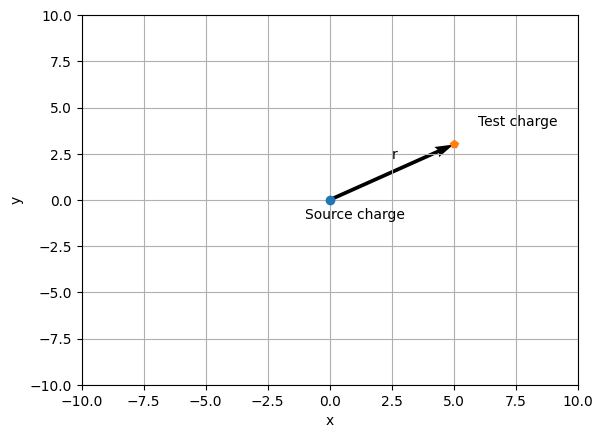

In [3]:
x0 = 0 # x coordinate of source charge (meters, m)
y0 = 0 # y coordinate of source charge (m)
x_test = 5 # x coordinate of test charge (m)
y_test = 3 # y coordinate of test charge (m)
r_x = x_test - x0 # x component of displacement vector to test charge
r_y = y_test - y0 # y component of displacement vector to test charge
fig = plt.figure()
ax = plt.axes()
ax.plot(x0,y0,marker='o'); # plot source charge
ax.text(x0-1,y0-1,'Source charge')
ax.plot(x_test,y_test,marker='p'); # plot example test charge
ax.text(x_test+1,y_test+1,'Test charge')
ax.quiver(x0,y0,r_x,r_y,color='k',
          angles='xy',scale_units='xy',scale=1) # plot a vector from the source to test charge, represent actual distance
ax.text(x0 + 0.5*r_x,y0 + 0.75*r_y,'r')          
ax.set_xlim([-10,10]); ax.set_ylim([-10,10]);
ax.set_xlabel('x'); ax.set_ylabel('y');
ax.grid()

Our goal is to calculate and visualize the electric field that would be experienced by a test charge anywhere in space.

The equation for the electric field generated by a point charge is given by $\vec{E} = \frac{kQ}{r^{2}}\hat{r}$. 

Recall, $k$ is the universal Coulomb constant ($k = 8.99 \times 10^9 \frac{Nm^{2}}{C^{2}}$), $Q$ is the magnitude of our source charge, $r$ is the distance from the test charge to the source charge, and $\hat{r}$ is the unit vector from the source charge to test charge. 

$\hat{r}$ will depend on the location of the source and test charge, and is given by:

$\hat{r} = \frac{\vec{r}}{r^{2}}$, where

$\vec{r} = (x - x_{0}) \hat{x} + (y - y_{0}) \hat{y}$

$r = \sqrt{(x-x_{0})^2 + (y - y_{0})^2}$.

Putting this together, $\vec{E}$ is given by,

$\vec{E} = \frac{kQ}{r^{2}} \frac{\vec{r}}{r} = \frac{kQ}{r^{3}}\vec{r}=\frac{kQ}{r^{3}}[ (x - x_{0})\hat{x} + (y - y_{0}) \hat{y}]$


We can separate this vector field into its two components (in 2D), $E_{x}$ and $E_{y}$:

$E_{x} = \frac{kQ}{r^{3}}(x - x_{0})\hat{x}$

$E_{y} = \frac{kQ}{r^{3}}(y - y_{0})\hat{y}$

Now, let's try calculating these components over a grid of test charge positions with numpy arrays. We'll start by creating a 2D grid of points using `np.linspace` and `np.meshgrid`.


In [4]:
N = 21 # number of grid points in x and y direction
x = np.linspace(-10,10,N) # x coordinates (m)
y = np.linspace(-10,10,N) # y coordinates (m)
X, Y = np.meshgrid(x,y) # make 2D grid of x coordinates and y coordinates 

Take a moment to inspect these grids to get some intuition for how they're defined. What happens when you change the row index for the `X` array (e.g., `X[0,0]` vs. `X[1,0]` or column index for the `Y` array (e.g., `Y[0,0]` vs. `Y[0,1]`)?

In [5]:
# Test out indexing X and Y here
# for i in range(21):
#   for j in range(21):
#     print(X[i, j], Y[i, j])

Now, let's calculate $E_{x}$ and $E_{y}$ at these grid points for a unit source charge

In [6]:
k = 8.99e9 # Coulomb's constant (N m^2 / C^2)
Q = 1 # source charge (C)
r = np.sqrt((X - x0)**2 + (Y-y0)**2) # distance from each position to source charge
Ex = k*Q*(X - x0)/r**3  
Ey = k*Q*(Y - y0)/r**3 

<ipython-input-6-94ccb346e9ae>:4: RuntimeWarning: invalid value encountered in true_divide
  Ex = k*Q*(X - x0)/r**3
<ipython-input-6-94ccb346e9ae>:5: RuntimeWarning: invalid value encountered in true_divide
  Ey = k*Q*(Y - y0)/r**3


***Q1***: What dimensions do you expect `r` to be? What are the units of $E_{x}$ and $E_{y}$?






I would expect the dimensions to be a 21 x 21 matrix as well. I would expect the units of Ex and Ey to both be N/mC.

Now let's plot using `np.quiver`

(-11.0, 11.0, -11.0, 11.0)

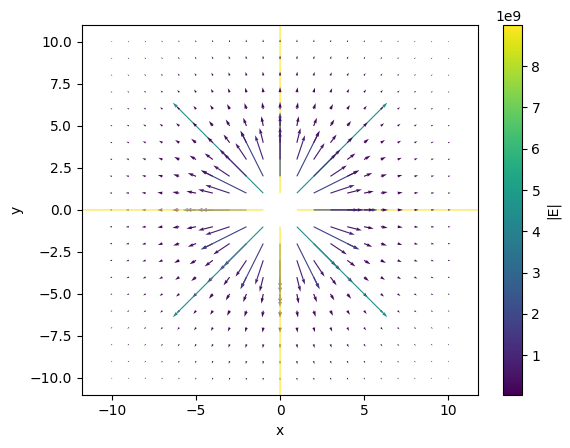

In [7]:
Emag = np.hypot(Ex,Ey) # magnitude of E-field at each location

fig = plt.figure()
ax = plt.axes()
q = ax.quiver(X,Y,Ex,Ey,Emag)
ax.set_xlabel('x'); ax.set_ylabel('y');
cbar = plt.colorbar(q)
cbar.ax.set_ylabel('|E|')
ax.axis('equal') # make x and y axis scaling equal

***Q2***: Does this plot make sense? What's going on at `(0,0)`? 





This plots the strength of the electric field at each point. At (0, 0), r = 0 so the magnitude of the field vetors is infinite and thus should not be displayed.

Now, if we want to move the source charge and replot, rather than rewriting all the code above, define a function to calculate the E-field given the charge location, magnitude, and test charge coordinates (`calcEfield`) and a function to plot the vector field (`plotEfieldVecs`) given. To make things easier to interpret, plot the vectors with unit length and set their color to be the magnitude normalized to the global max.

In [8]:
def calcEfield(x0, y0, X, Y, Q): # add inputs here
  k = 8.99e9 # Coulomb's constant (N m^2 / C^2)
  r = np.sqrt((X - x0)**2 + (Y-y0)**2) # distance from each position to source charge
  Ex = k*Q*(X - x0)/r**3  
  Ey = k*Q*(Y - y0)/r**3 
  return Ex, Ey

def plotEfieldVecs(Ex, Ey, X, Y): # add inputs here
  Emag = np.hypot(Ex,Ey) # magnitude of E-field at each location
  fig = plt.figure()
  ax = plt.axes()
  q = ax.quiver(X,Y,Ex,Ey,Emag)
  ax.set_xlabel('x'); ax.set_ylabel('y');
  cbar = plt.colorbar(q)
  cbar.ax.set_ylabel('|E|')
  ax.axis('equal') # make x and y axis scaling equal
  return fig, ax

Now, use your functions to plot the E-field for a source charge located at `(1.3,2.4)`. Generate plots for both a positive and negative source charge.

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x', ylabel='y'>)

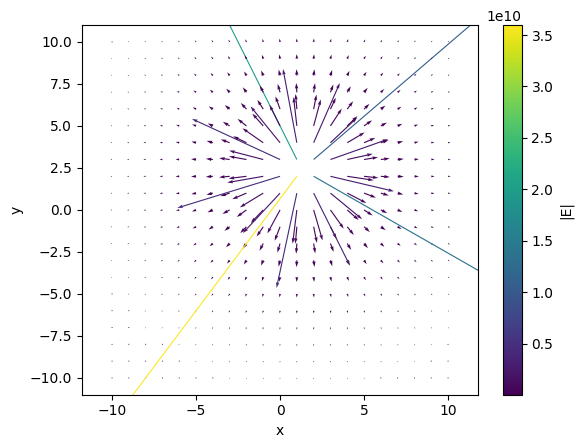

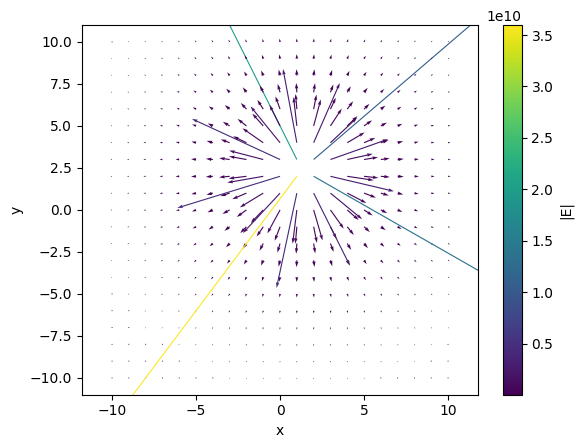

In [9]:
x = 1.3
y = 2.4
Ex, Ey = calcEfield(x, y, X, Y, 1)
plotEfieldVecs(Ex, Ey, X, Y)
Ex, Ey = calcEfield(x, y, X, Y, 1)
plotEfieldVecs(Ex, Ey, X, Y)

# Adding more point charges

So far, the plots are kinda boring. Since we have only one source charge, we just get a radial field centered at the source charge location. What happens if we have a bunch of point charges distributed in space? Modify your calcEfield function to take as input a vector of source charge x coordinates and a vector of y coordinates, instead of a single pair of x and y coordinates, and output the total E-field x and y components ($E_{x}$ and $E_{y}$).

In [10]:
def calcEfield(x0,y0,x, y,Q):
  k = 8.99e9 # Coulomb's constant  
  if len(x0) != len(y0):
    return 0, 0
  Ex = 0
  Ey = 0
  for i in range(len(Q)):
    r = np.sqrt((x - x0[i])**2 + (y-y0[i])**2) # distance from each position to source charge
    Ex = Ex + k*Q[i]*(x - x0[i])/r**3  
    Ey = Ey + k*Q[i]*(y - y0[i])/r**3 
  return Ex, Ey

Now use your revised `calcEfield` function and `plotEfieldVecs` to plot the E-field produced by source charges at `(-5,0)` and `(5,0)`, both with $Q=+1$

<ipython-input-10-ae9ba92eb1d6>:9: RuntimeWarning: invalid value encountered in true_divide
  Ex = Ex + k*Q[i]*(x - x0[i])/r**3
<ipython-input-10-ae9ba92eb1d6>:10: RuntimeWarning: invalid value encountered in true_divide
  Ey = Ey + k*Q[i]*(y - y0[i])/r**3


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x', ylabel='y'>)

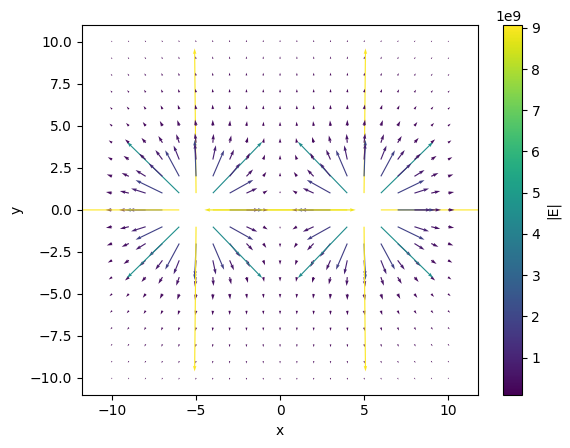

In [11]:
x0 = np.array([-5, 5, 0])
y0 = np.array([0, 0, 0])
Q = np.array([1, 1, 0])
Ex, Ey = calcEfield(x0,y0,X,Y,Q);
plotEfieldVecs(Ex, Ey, X, Y)


***Q3***: What happens when you make one charge negative at `x=0`? What if the charges are unequal?  

If one of the charges becomes negative at x=0, the vector field becomes more pointed towards x=0 with the magnitude of the change depending on the magnitude of the charge. If the charges are unequal, then the charge with the higher magnitude will have the vector field point away from it more than the other charge, with this discrepancy dependent on the difference in magnitude between the two charges.

For fun, let's use your function to plot the E-field distribution for 5 charges with random positions (within the bounds of our `X` and `Y` grid) and random charges from $(-1,1)$. Hint: Look up the `np.random.uniform` function

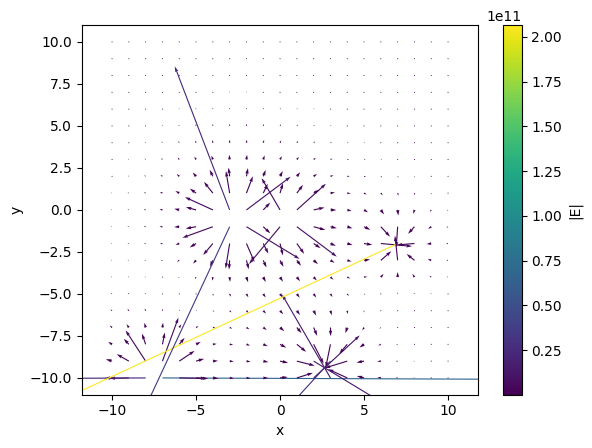

In [12]:
Ncharges = 5
x0 = np.random.uniform(-10, 10, Ncharges)
y0 = np.random.uniform(-10, 10, Ncharges)
Q = np.random.uniform(-1, 1, Ncharges)
Ex, Ey = calcEfield(x0,y0,X,Y,Q);
plotEfieldVecs(Ex, Ey, X, Y);

Visualizing the vector field is useful to understand the direction and magnitude of the field at each location, but in some cases, we'd just like to know the magnitude. We can visualize this using a 3D surface plot. To do this in an interactive plot, let's turn to a more advanced plotting package called [plotly](https://plotly.com/python/). Luckily, plotly is already installed in the default google colab python environment. We'll wrap this in a function so we can reuse it later. Also, for these plots, it'll help to have a more densely sampled grid. 

In [13]:
import plotly.graph_objects as go

N = 101 # number of grid points in x and y direction
x = np.linspace(-10,10,N) # x coordinates (m)
y = np.linspace(-10,10,N) # y coordinates (m)
X, Y = np.meshgrid(x,y) # make 2D grid of x coordinates and y coordinates 

Ex, Ey = calcEfield(x0,y0,X,Y,Q); # recalculate on new grid
Emag = np.hypot(Ex,Ey)
Emag_norm = Emag/Emag.max() # normalize to get a sense of relative values

def plotMag3D(X,Y,mag):
  fig = go.Figure(go.Surface(x=X,y=Y,z=mag))  
  fig.update_layout(scene_aspectmode='cube')  
  fig.show()

plotMag3D(X,Y,Emag_norm)

Another way to visualize this distribution is as a 2D heatmap, which we can do using another function in the `plotly` library (specifically in the `express` module)

In [14]:
import plotly.express as px 

def plotMag2D(x,y,mag): # use 1D arrays instead of 2D
  fig = px.imshow(mag,x=y,y=x,labels={'x':'x','y':'y'})    
  return fig

plotMag2D(x,y,np.log10(Emag_norm))

Since the E-field magnitude is so sharply peaked, it can be hard to see how it varies in space. 

***Q4***: Can you think of a way to make variations in the distribution easier to visualize? (hint: transform the E-field magnitude values)

One way that I can think of is reducing the magnitude of the centers which are extremely high such as square rooting or cube rooting the magnitude of the values. This would make it easier to visualize as the big spikes where the charges are located would be significantly reduced while chargers of smaller values would be reduced less. Another way to visualize this would be to make a topographic map which would display the different levels of different points on the map.

***Q5***: What would the current density distribution look like? Describe how you would you modify your `calcEfield` function to output current density instead. 

Current density should be proportional to the magnitude of the electric field, so I would just add np.hyp(Ex, Ey) to the end and return the magnitudes.

# From E-field to voltage

As covered in class, the electric field can also be represented as a potential distribution, or **voltage**. One key difference to note is the electric field is a *vector* field, meaning it has both magnitude and direction at each point in space, while the voltage is a scalar, meaning it is represented by a single value (magnitude) at each point in space. The E-field flows from high to low potentials. 

The voltage for a point charge in free space is given by, $V = \frac{kQ}{r}$. Write a function called `calcV` to calculate the voltage generated by a set of point charges and plot this distribution for the same point charges as above in a surface plot using our `plotMag` function (Tip: start from your `calcEfield` function)


In [15]:
def calcV(x0,y0,X,Y,Q):
  k = 8.99e9 # Coulomb's constant  
  V = np.zeros(X.shape)  
  for x0i,y0i,Qi in zip(x0,y0,Q):
    r = np.sqrt((X - x0i)**2 + (Y-y0i)**2) # distance from each position to source charge
    V += k*Qi/r
  return V

V = calcV(x0,y0,X,Y,Q)
Vnorm = V/V.max() # normalize to max
plotMag2D(x,y,Vnorm)


To get a bit more intuition, let's visualize the decay of voltage and E-field magnitude with distance in one dimension

One way to do this is extract a 'slice' of voltage values at a single x or y value where we placed a point charge. 

Text(0, 0.5, 'V (norm.)')

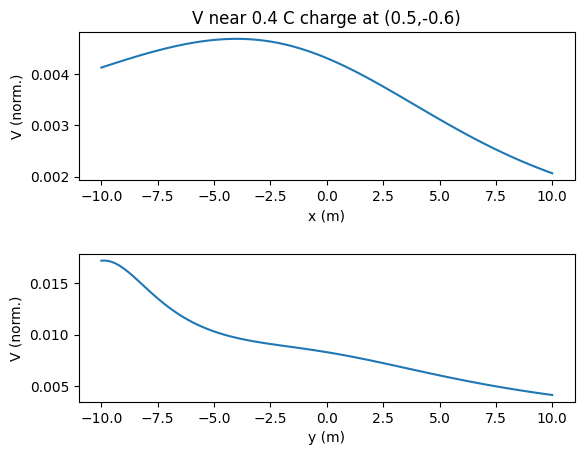

In [16]:
q_index = 1 # choose which charge to extract slice at 

# Find the row closest to the y coordinate of the charge
row_index = round(y0[q_index])
# Find the column closest to the x coordinate of the charge
col_index = round(x0[q_index])

fig = plt.figure()

ax = fig.add_subplot(211)
# ax.plot(x,V[row_index,:]/np.max(np.abs(V[row_index,:])))
ax.plot(x,Vnorm[row_index,:])
plt.xlabel('x (m)')
ax.set_xlabel('x (m)'); ax.set_ylabel('V (norm.)')
ax.set_title('V near {:.1f} C charge at ({:.1f},{:.1f})'.format(Q[q_index],x0[q_index],y0[q_index]))
fig.subplots_adjust(hspace=0.5) # make space between subplots so x label is visible

ax2 = fig.add_subplot(212)
# ax2.plot(y,V[:,row_index]/np.max(np.abs(V[:,row_index])))
ax2.plot(y,Vnorm[:,col_index])
ax2.set_xlabel('y (m)'); ax2.set_ylabel('V (norm.)')

Do these plots look as you'd expect given the location of the point charges? Yes

# Currents in linear circuits

Now that we've visualized fields and potential distributions for abstract point charges in space, let's turn to the more idealized world of circuits.  Here, it's easier to deal with things in terms of voltages (potential differences) and currents. As you'll see soon, the approaches we use to analyze currents and voltages in discrete circuit elements will be directly applicable to modeling neurons.

We'll stick to linear circuits for now, which means the voltages and currents obey the superposition principle. This is the case when the values of the circuit elements, i.e., resistance and capacitance, in our case, do not vary with the level of voltage or current.

Starting with a voltage applied across two resistors (circuit shown below), write a function that calculates the current $I$ as a function of the voltage $V$ from the voltage source and the values of the two resistances $R_{1}$ and $R_{2}$. Using this function, what would the current be in milliAmperes (mA) if $V=1 \; V$, $R_{1} = 1 \; k\Omega$, and $R_{2} = 3 \; k\Omega$. Output your answer in a print statement. 

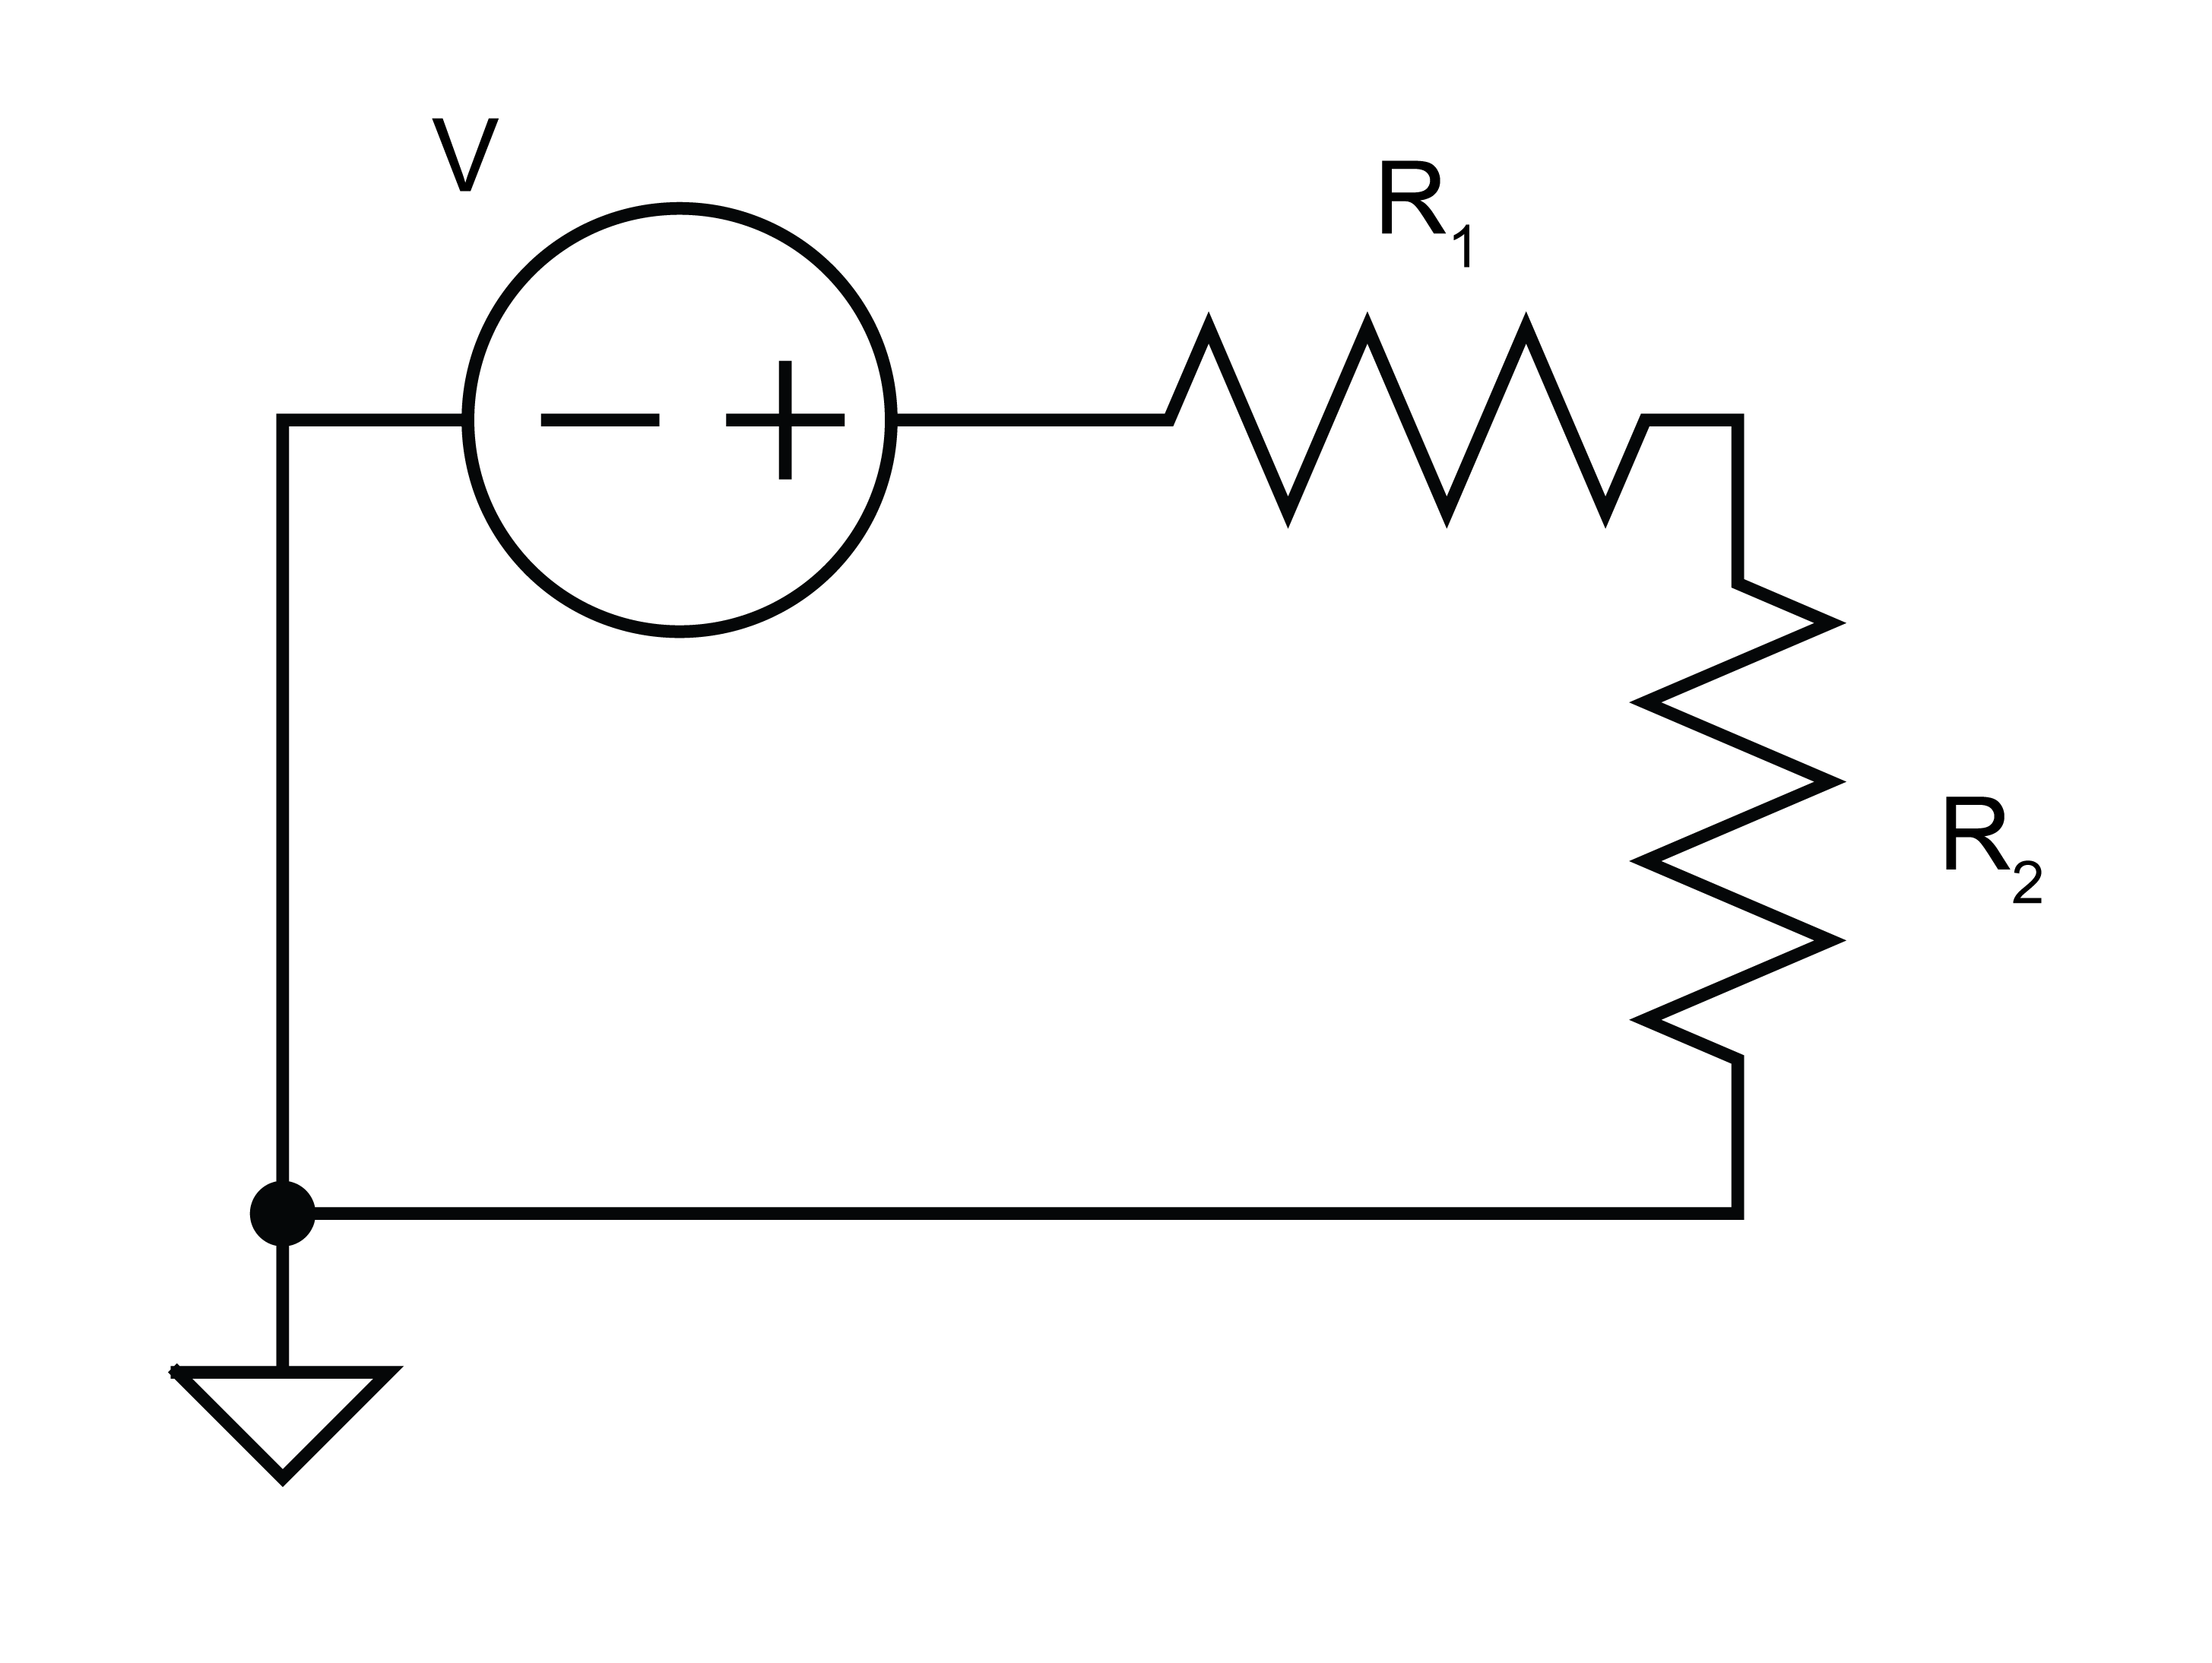

In [17]:
from IPython.display import Image
Image('CompModNervSys-BioElectroStatics/resources/circuit_2R_series.png',width=300)

In [22]:
def calcIseriesR(V, Rs): # function arguments here
  # your code goes here
  sum = np.sum(Rs)
  return V / sum


Rs = [1, 3]
V = 1
I = calcIseriesR(V, Rs) # function arguments here
print('I = {} mA'.format(I)) # add output variable here, check units!

I = 0.25 mA


This circuit also has an interesting property if we were to instead analyze the voltage across the second resistor.

Using Ohm's law, we know $V = I(R_{1} + R_{2})$. The voltage across just the second resistor is just $V_{2} = IR_{2}$, since the current is the same everywhere in the circuit. After doing some algebra to solve for $V_{2}$, we get:

$V_{2} = V\frac{R_{2}}{R_{1} + R_{2}}$. 

This is what's known as a *voltage divider* circuit (you can read more [here](https://en.wikipedia.org/wiki/Voltage_divider)). The voltage across the second resistor (or the first, we could have picked either one) is given by the ratio of its resistance to the sum of the two resistances, which we can call $n = R_{2}/R_{1}$. 

To visualize this, make a plot of $V_{2}/V$ as a function of the ratio of the two resistances 

(Hint: you can do a little more algebra to get a unitless form of this equation, i.e., $V_{2}/V = \text{something without }R$).

(Recommendation: use `np.logspace` and use log scale for your x and y axis)


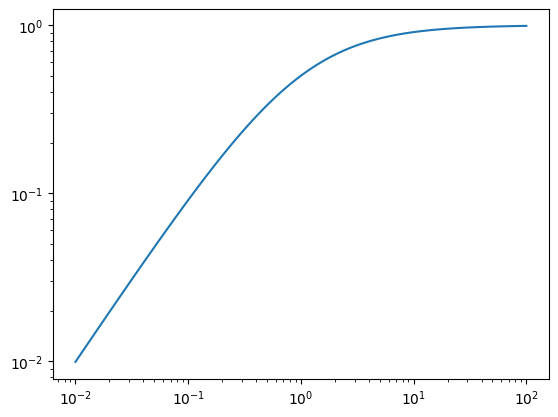

In [42]:
precision = 100
n = np.logspace(-2, 2, num=precision)
V2 = V * (n/(n+1))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(n, V2)
fig.show()

***Q6***: Is it possible to set the resistances such that $V_{2}$ is greater than $V$? What happens when $R_{2} >> R_{1}$ (significantly greater than) or $R_{2} << R_{1}$ (significantly less than)

No, this would imply that R2/(R1+R2) is greater than 1. Because static resistances in practice are always positive, this is never possible.




Next, let's look at a voltage applied across two resistors in parallel. Use Ohm's law (and Kirchoff's current law) to write a function that calculates the current $I$ as a function of the voltage $V$ from the voltage source and the values of the two resistances $R_{1}$ and $R_{2}$. Using this function, what would the current be in milliAmperes (mA) if $V=1 \; V$, $R_{1} = 4.5 \; k\Omega$, and $R_{2} = 0.5 \; k\Omega$. Output your answer in a print statement. 

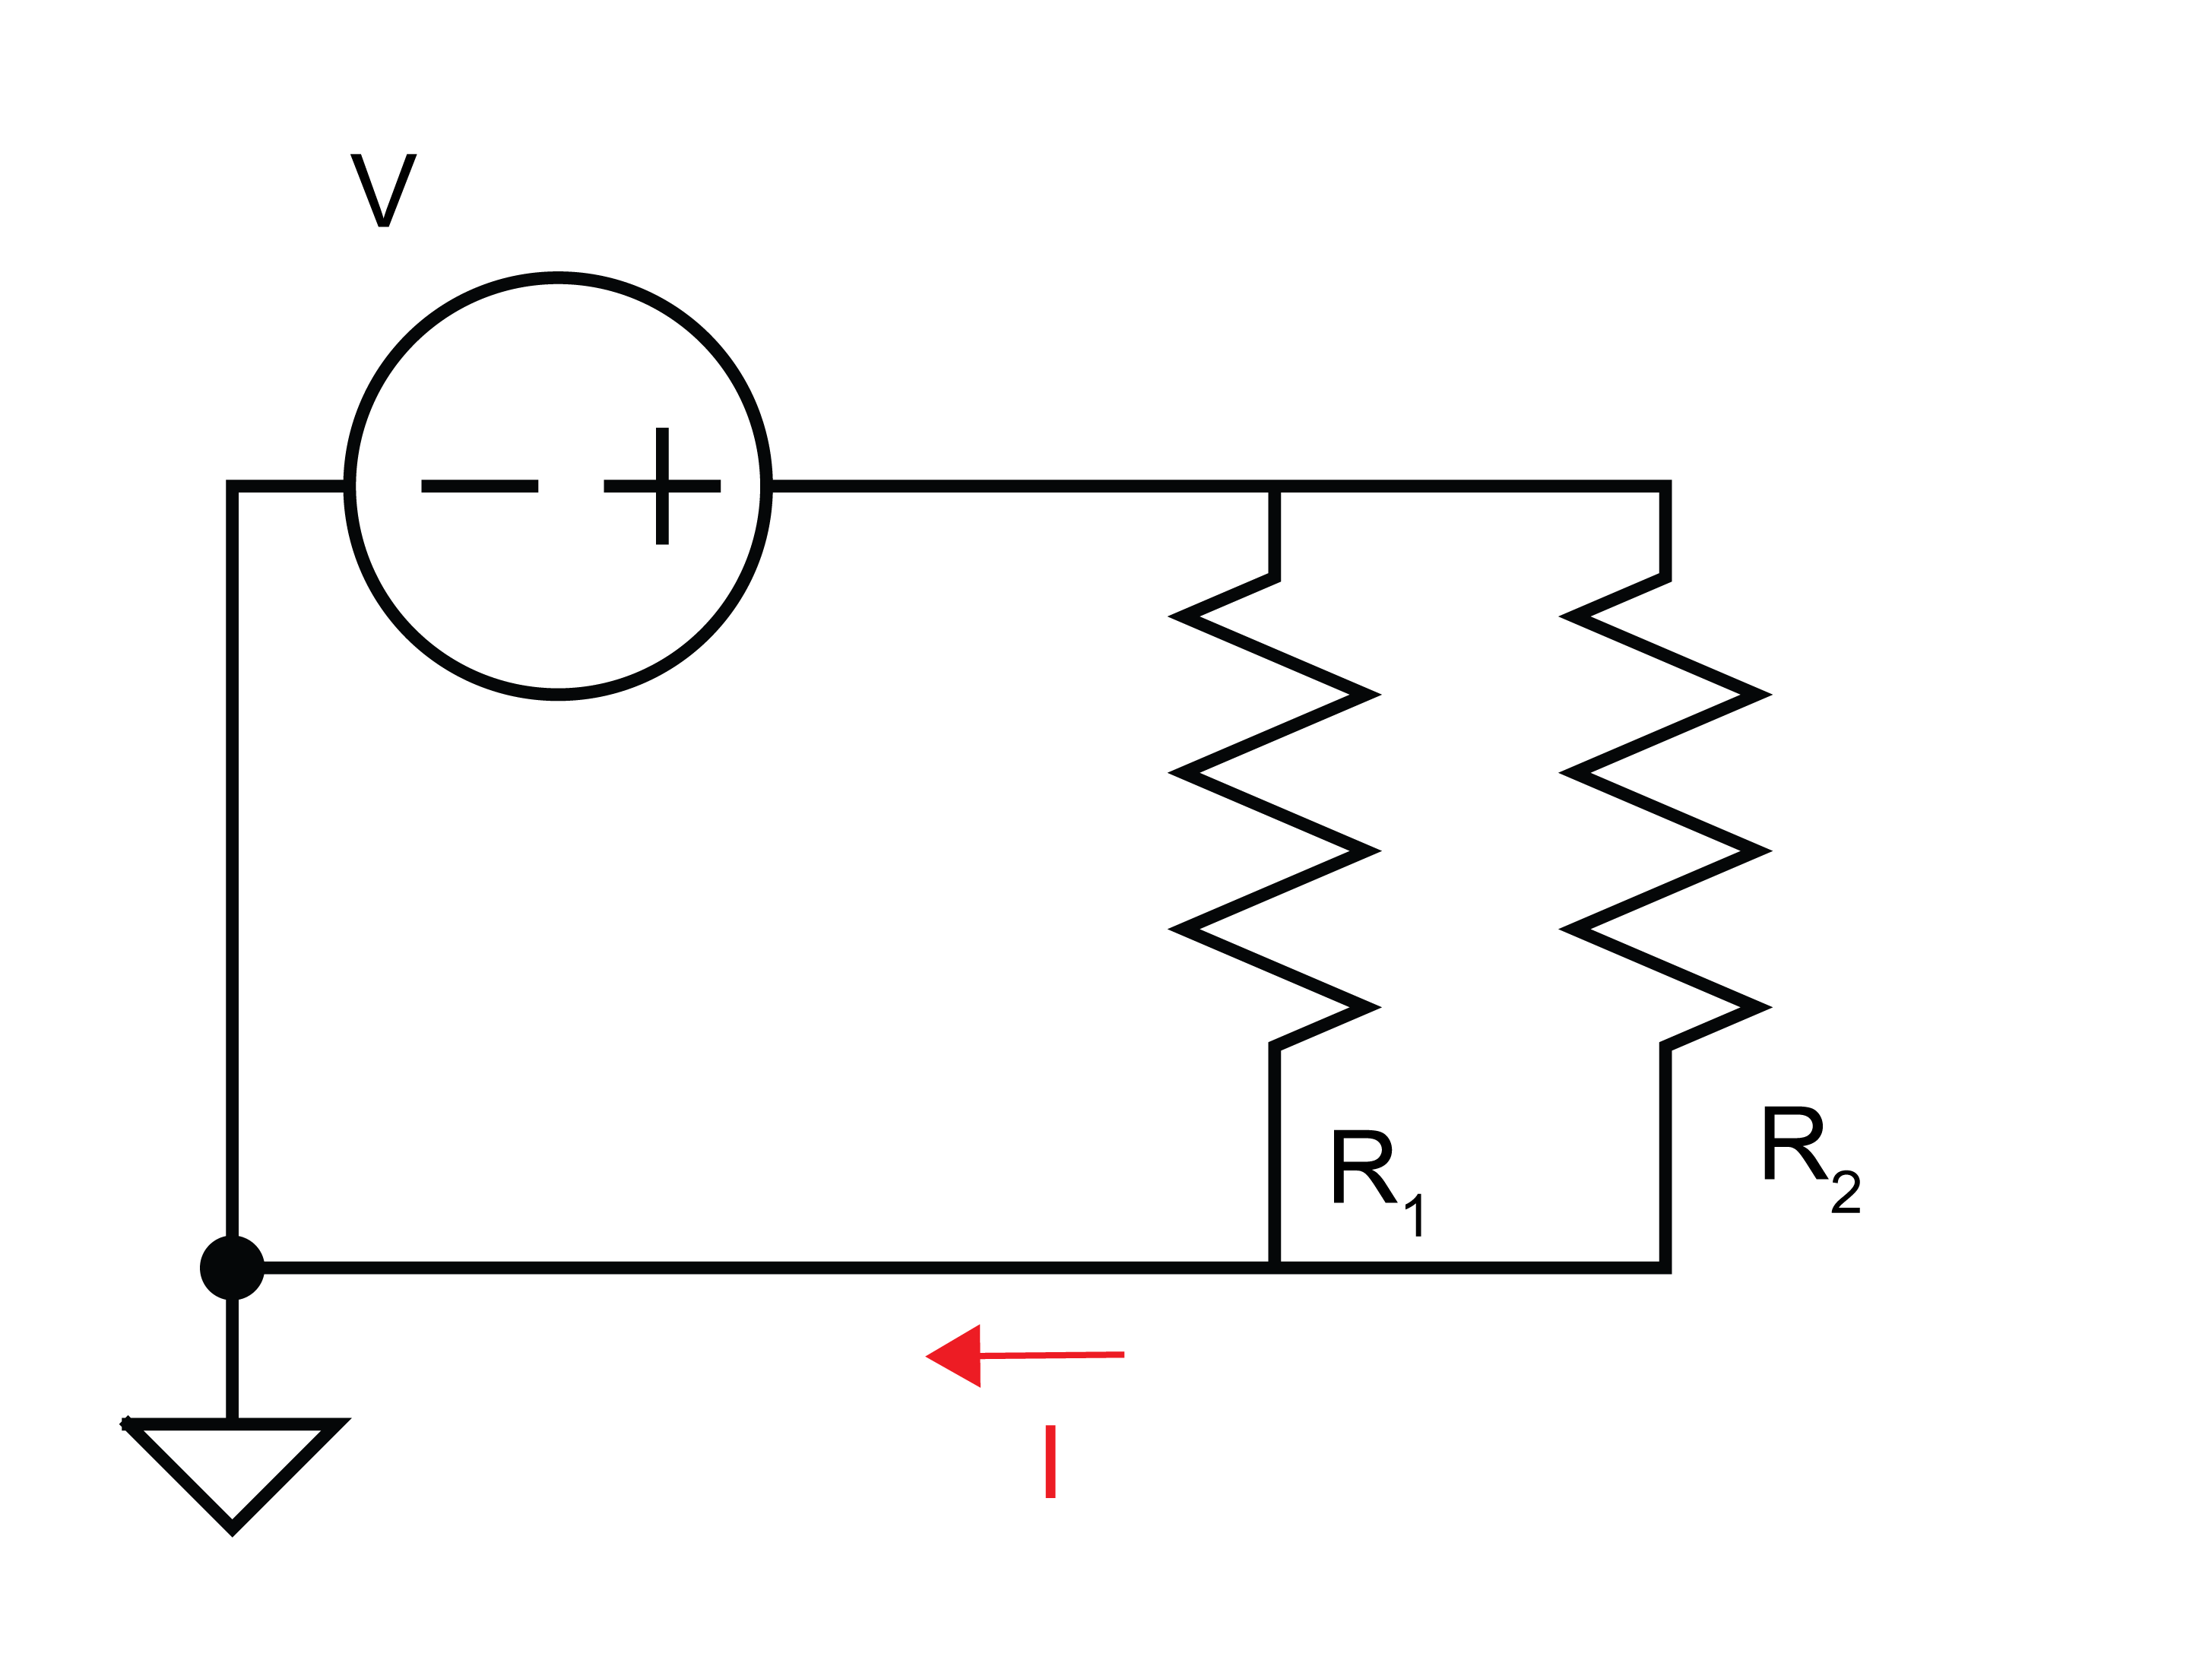

In [20]:
from IPython.display import Image
Image('CompModNervSys-BioElectroStatics/resources/circuit_2R_parallel.png',width=300)

In [47]:
def calcIparallelR(V, Rs): # function arguments here
  # your code goes here
  Rs_reciprocal = np.reciprocal(Rs)
  R_equiv = 1 / np.sum(Rs_reciprocal)
  return V / R_equiv
# Use your function to calculate current for values given and print here
V = 1
Rs = [4.5, 0.5]
I = calcIparallelR(V, Rs)
print('I = {} mA'.format(I)) # add output variable here, check units!

I = 2.2222222222222223 mA


Suppose that instead of just 2 resistors, we had $N$ resistors in parallel. Can you modify your function to calculates the current $I$ as a function of the voltage $V$ from the voltage source and an array of parallel resistances? Here's the formula for computing the equivalent resistance of resistors in parallel:

$ R_{equiv} = (1/R_{1} + 1/R_{2} + ... 1/R_{N})^{-1} = \sum_{i=1}^{N}(1/R_{i})^{-1}$

Use your function to calculate the total current $I$ for $V=1 \; V$ and the following set of parallel resistances:
[1,10,13,4.5,9] $k \Omega$

In [48]:
# Your code goes here
V = 1
Rs = [1, 10, 13, 4.5, 9]
I = calcIparallelR(V, Rs)
print('I = {} mA'.format(I)) # add output variable here, check units!

I = 1.5102564102564102 mA
